In [2]:
from pathlib import Path

import cv2
import nengo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import itti_koch_niebur_nengo as iknn

img_path = str(Path(
    '../../data/visual_search_stimuli/'
    'ikkn_RVvGV/RVvGV/4/present/RVvGV_set_size_4_target_present_3.png')
)

img = cv2.imread(img_path)

S = iknn.visual_cortex.saliency.img_to_S(img)
S_flat = S.flatten()

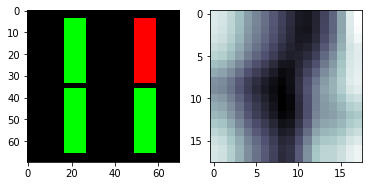

In [2]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(iknn.utils.BGR2RGB(img))
ax[1].imshow(S, cmap='bone');

In [3]:
net = nengo.Network()
with net:
    S_node = nengo.Node(output=S_flat)
    
    pulv_dims = S_node.size_out
    pulvinar = nengo.Ensemble(n_neurons=pulv_dims * 2, dimensions=pulv_dims)
    nengo.Connection(S_node, pulvinar)
    p_pulv = nengo.Probe(pulvinar, synapse=0.01)
    
    wta = iknn.fef.LCA(dimensions=pulv_dims, n_neurons=pulv_dims * 2)
    nengo.Connection(pulvinar, wta.input)
    p_wta = nengo.Probe(wta.output, synapse=0.01)

    wta_max = nengo.Ensemble(n_neurons=500, dimensions=1, radius=pulv_dims * 2)
    wta_max_c = nengo.Connection(wta.output, wta_max, function=np.argmax)
    p_wta_max = nengo.Probe(wta_max, synapse=0.01)
    p_wta_max_c = nengo.Probe(wta_max_c)

In [4]:
sim = nengo.Simulator(network=net)
with sim:
    sim.run(0.4)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

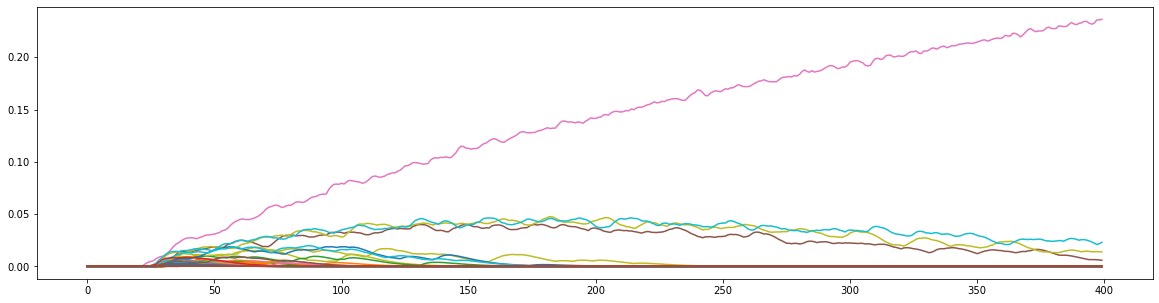

In [31]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(np.arange(400), sim.data[p_wta]);

In [44]:
np.mean(sim.data[p_wta][200:, :], axis=0).argmax()

156

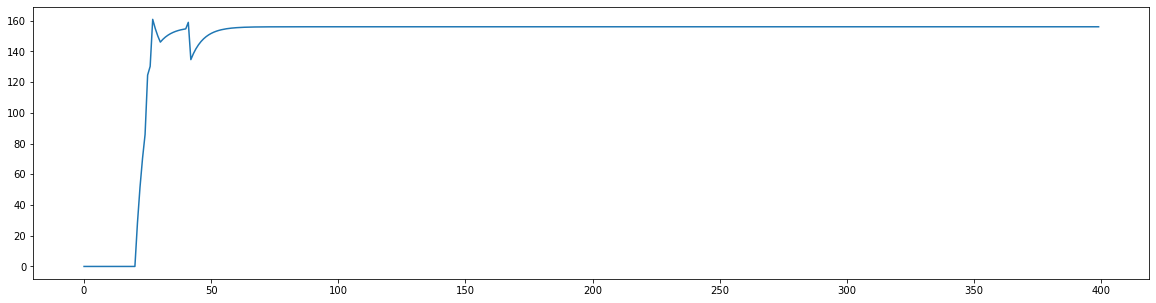

In [28]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(np.arange(400), sim.data[p_wta_inp]);

In [47]:
sim.data[p_wta_inp][200:]

array([[156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [156.],
       [15

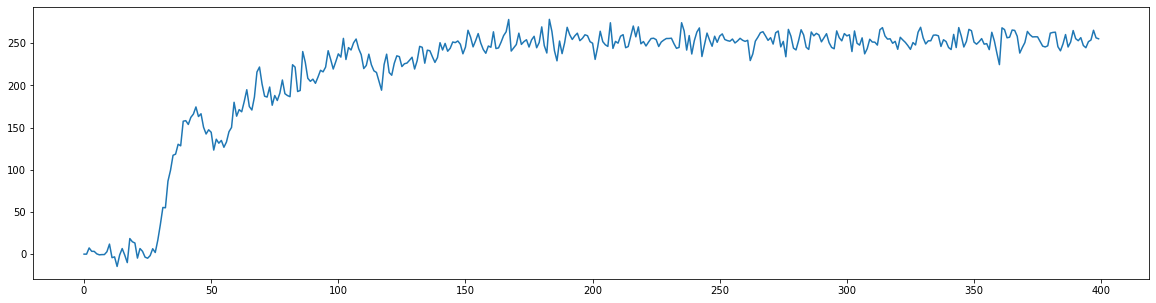

In [23]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(np.arange(400), sim.data[p_wta_max]);

In [30]:
np.argsort(S_flat)

array([188, 206, 170, 224, 152, 207, 189, 225, 134, 169, 171, 187, 135,
       151, 153, 242, 205, 117,  47, 243,  29, 116,  11,  46,  64,  65,
        28, 168,  10, 223, 133,  82, 260, 150,  99, 186, 261, 100,  83,
        81,  12,  30, 118,  48, 278, 241, 204,  63,  98, 167, 136, 208,
       314,  45,  66, 115, 226, 296, 279, 190,  27, 101, 132, 222,   9,
       149, 154, 172,  80, 185, 315, 259, 297,  84, 244, 119, 203,  62,
       240, 166,  97, 277, 114, 131,  44, 221, 148, 102,  26, 262,   8,
       313, 295,  13,  31, 137, 184,  49, 258,  79,  67, 239, 202, 280,
       209,  61, 155, 227, 113, 120, 191,  96, 130, 276, 173,  43, 220,
        25, 165,   7,  85, 312, 294, 298, 245, 257, 147, 316,  78, 138,
        14, 183,  32,  50, 238,  60,  95, 112, 103, 275, 263,  68,  42,
       201,  24,   6, 311, 129, 293,  77, 164, 156, 256, 146, 219, 121,
        86,  59, 192,  94, 281, 174, 210, 182,  41,  23, 228,   5, 274,
       163, 111, 237, 139,  76, 145, 104, 310, 128, 200, 292, 16

try again w/simplified input

In [33]:
fake_S = np.zeros((10,))
fake_S[2] = 1

In [38]:
net = nengo.Network()
with net:
    S_node = nengo.Node(output=fake_S)
    
    pulv_dims = S_node.size_out
    pulvinar = nengo.Ensemble(n_neurons=100, dimensions=pulv_dims)
    nengo.Connection(S_node, pulvinar)
    p_pulv = nengo.Probe(pulvinar, synapse=0.01)
    
    wta = iknn.fef.LCA(dimensions=pulv_dims, n_neurons=100)
    nengo.Connection(pulvinar, wta.input)
    p_wta = nengo.Probe(wta.output, synapse=0.01)

    wta_max = nengo.Ensemble(n_neurons=100, dimensions=1, radius=20)
    wta_max_c = nengo.Connection(wta.output, wta_max, function=np.argmax)
    p_wta_max = nengo.Probe(wta_max, synapse=0.01)
    p_wta_max_c = nengo.Probe(wta_max_c)

In [39]:
sim = nengo.Simulator(network=net)
with sim:
    sim.run(0.4)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

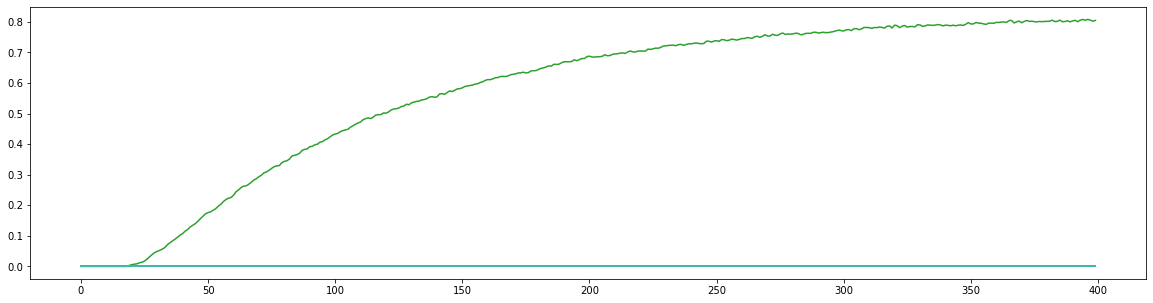

In [40]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(np.arange(400), sim.data[p_wta]);

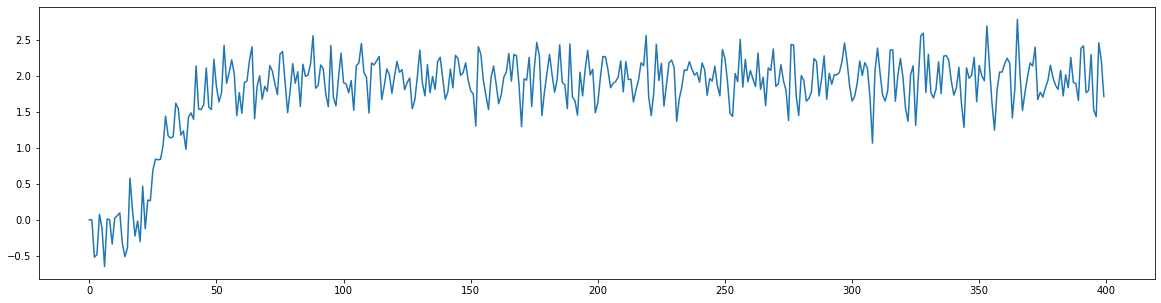

In [41]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(np.arange(400), sim.data[p_wta_max]);

In [24]:
sim.data[p_wta_max].shape

(400, 1)

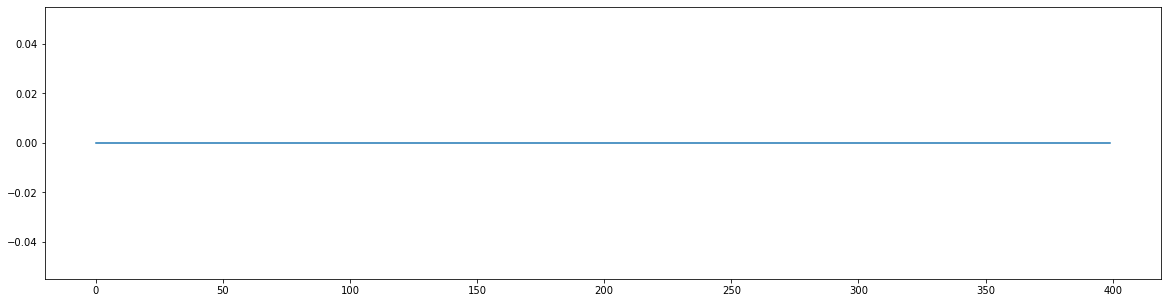

In [23]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(np.arange(400), sim.data[p_wta_max_c]);